# Лабораторная работа №7

Маратова Диана AIN-2-21

        1. Изучите материал лекции 12, проделайте пример, описанный в ходе работы.

In [17]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")

text_train, y_train = reviews_train.data, reviews_train.target
print(type(text_train))
print(len(text_train))
text_train[1]

<class 'list'>
25000


b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [18]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [19]:
import numpy as np
np.unique(y_train)

array([0, 1])

In [20]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

In [21]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print(len(text_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
np.bincount(y_test)

25000


array([12500, 12500], dtype=int64)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [23]:
vect

CountVectorizer()

In [26]:
feature_names = vect.get_feature_names_out()
print(len(feature_names))
print(feature_names[:20])
print(feature_names[20010:10030])
print(feature_names[::2000])


74849
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
[]
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(np.mean(scores))

0.8729199999999999


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
grid.best_params_

0.89444


{'C': 0.001}

In [29]:
X_test = vect.transform(text_test)
grid.score(X_test,y_test)

0.8788

In [30]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
repr(X_train)

"<25000x27271 sparse matrix of type '<class 'numpy.int64'>'\n\twith 3354014 stored elements in Compressed Sparse Row format>"

In [31]:
feature_names = vect.get_feature_names_out()
print(feature_names[:50])
print(feature_names[20010:20030])
feature_names[::700]

['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']


array(['00', 'affections', 'appropriately', 'barbra', 'blurbs',
       'butchered', 'cheese', 'commitment', 'courts', 'deconstructed',
       'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest',
       'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom',
       'messiah', 'music', 'occasional', 'parking', 'pleasantville',
       'pronunciation', 'recipient', 'reviews', 'sas', 'shea', 'sneers',
       'steiger', 'swastika', 'thrusting', 'tvs', 'vampyre', 'westerns'],
      dtype=object)

In [53]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)

0.89444


In [34]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS)[::10])

318
['mine', 'nor', 'wherever', 'made', 'have', 'everywhere', 'toward', 'hasnt', 'how', 'his', 'first', 'onto', 'amongst', 'against', 'being', 'forty', 'third', 'your', 'without', 'ever', 'several', 'see', 'move', 'himself', 'empty', 'was', 'off', 'this', 'above', 'upon', 'three', 'can']


In [35]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
repr(X_train)

"<25000x26966 sparse matrix of type '<class 'numpy.int64'>'\n\twith 2149958 stored elements in Compressed Sparse Row format>"

In [54]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)

0.89444


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(pipe,param_grid, cv=5)
grid.fit(text_train,y_train)
print(grid.best_score_)

0.8938400000000002


In [47]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
print(feature_names[sorted_by_tfidf[:20]])
print(feature_names[sorted_by_tfidf[-20:]])


['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [57]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=10000))

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe,param_grid, cv=5)
grid.fit(text_train,y_train)
print(grid.best_score_)
grid.best_params_

0.9063599999999999


{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)}

(-22.0, 22.0)

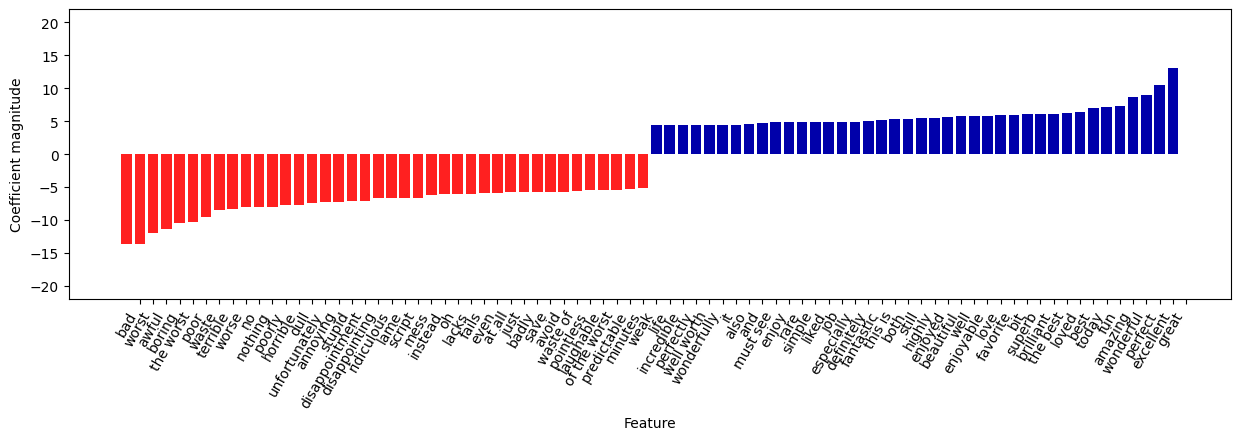

In [69]:
import mglearn
import matplotlib.pyplot as plt
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)
plt.ylim(-22,22)

        2. Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.

In [127]:
book_rewiews = [
    "The book was a thrilling adventure from start to finish. I couldn't put it down.",
    "An absolute masterpiece! The author's storytelling is captivating and thought-provoking.",
    "I found the characters to be well-developed and relatable. A truly engaging read.",
    "This book surpassed all my expectations. The plot twists kept me on the edge of my seat.",
    "A must-read for anyone who loves a good mystery. The suspense is expertly crafted.",
    "The prose is poetic and evocative. I was transported into the world of the story.",
    "The author's exploration of themes is profound. This book stayed with me long after I finished it.",
    "I couldn't get enough of the rich world-building. It felt like I was living in the story.",
    "The pacing is perfect. Each chapter leaves you hungry for more.",
    "An emotional rollercoaster! This book made me laugh, cry, and everything in between.",
    "The ending was satisfying and unexpected. I love when a book keeps me guessing until the last page.",
    "The dialogues are sharp and witty. The characters' conversations felt authentic.",
    "The narrative is beautifully layered. I discovered new nuances with each re-read.",
    "This book tackles important social issues with sensitivity and depth.",
    "I connected with the protagonist on a personal level. Their journey resonated with me.",
    "The plot was confusing, and I couldn't follow the story.",
    "I found the characters to be one-dimensional and uninteresting.",
    "This book did not live up to the hype. It was a letdown.",
    "The writing style was dull, and the pacing was off.",
    "I couldn't connect with any of the characters. They felt flat.",
    "The story lacked depth and failed to engage my interest.",
    "The dialogue felt forced, and the characters' motivations were unclear.",
    "The ending was abrupt and unsatisfying.",
    "I expected more from this book, but it fell short of my expectations.",
    "The themes explored in the book were not well-developed or meaningful."
]
y = [ 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0, 0, 0, 0, 0, 0, 0, 0]

##создала массив из 25 отзывов о книге 15-полож и 10-отриц


In [128]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(book_rewiews,y,random_state=0)

vect = CountVectorizer().fit(text_train)

X_train = vect.transform(text_train)

feature_names = vect.get_feature_names_out()
print(feature_names)
print("==================")
print(X_train.toarray())
repr(X_train)
## разделила на обуч и тест наборы
## создала мешок слов

['absolute' 'adventure' 'after' 'all' 'an' 'and' 'anyone' 'author'
 'beautifully' 'between' 'book' 'building' 'but' 'captivating' 'chapter'
 'characters' 'confusing' 'connected' 'couldn' 'crafted' 'cry' 'depth'
 'developed' 'dialogue' 'discovered' 'down' 'dull' 'each' 'edge'
 'emotional' 'ending' 'engage' 'enough' 'everything' 'expectations'
 'expected' 'expertly' 'exploration' 'explored' 'failed' 'fell' 'felt'
 'finish' 'finished' 'follow' 'for' 'forced' 'from' 'get' 'good'
 'guessing' 'hungry' 'important' 'in' 'interest' 'is' 'issues' 'it'
 'journey' 'keeps' 'kept' 'lacked' 'last' 'laugh' 'layered' 'leaves'
 'level' 'like' 'living' 'long' 'love' 'loves' 'made' 'masterpiece' 'me'
 'meaningful' 'more' 'motivations' 'must' 'my' 'mystery' 'narrative' 'new'
 'not' 'nuances' 'of' 'off' 'on' 'or' 'pacing' 'page' 'perfect' 'personal'
 'plot' 'profound' 'protagonist' 'provoking' 'put' 're' 'read' 'resonated'
 'rich' 'rollercoaster' 'satisfying' 'seat' 'sensitivity' 'short' 'social'
 'start' '

"<18x136 sparse matrix of type '<class 'numpy.int64'>'\n\twith 213 stored elements in Compressed Sparse Row format>"

In [131]:
scores = cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(np.mean(scores))

0.65


In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
grid.best_params_

0.6666666666666666


{'C': 0.001}

In [134]:
X_test = vect.transform(text_test)
grid.score(X_test,y_test)

0.42857142857142855

        3. Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»

In [148]:
vect = CountVectorizer(stop_words="english").fit(book_rewiews)
X_train = vect.transform(text_train)
feature_names = vect.get_feature_names_out()
print(feature_names)
repr(X_train)
## у нас стало на 22 признаков меньше было 136

['abrupt' 'absolute' 'adventure' 'authentic' 'author' 'beautifully' 'book'
 'building' 'captivating' 'chapter' 'characters' 'confusing' 'connect'
 'connected' 'conversations' 'couldn' 'crafted' 'depth' 'developed'
 'dialogue' 'dialogues' 'did' 'dimensional' 'discovered' 'dull' 'edge'
 'emotional' 'ending' 'engage' 'engaging' 'evocative' 'expectations'
 'expected' 'expertly' 'exploration' 'explored' 'failed' 'fell' 'felt'
 'finish' 'finished' 'flat' 'follow' 'forced' 'good' 'guessing' 'hungry'
 'hype' 'important' 'issues' 'journey' 'keeps' 'kept' 'lacked' 'laugh'
 'layered' 'leaves' 'letdown' 'level' 'like' 'live' 'living' 'long' 'love'
 'loves' 'masterpiece' 'meaningful' 'motivations' 'mystery' 'narrative'
 'new' 'nuances' 'pacing' 'page' 'perfect' 'personal' 'plot' 'poetic'
 'profound' 'prose' 'protagonist' 'provoking' 'read' 'relatable'
 'resonated' 'rich' 'rollercoaster' 'satisfying' 'seat' 'sensitivity'
 'sharp' 'short' 'social' 'start' 'stayed' 'story' 'storytelling' 'style'
 'sur

"<18x114 sparse matrix of type '<class 'numpy.int64'>'\n\twith 111 stored elements in Compressed Sparse Row format>"

In [137]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
## стоп-слова не особо улучшили точность модели

0.6666666666666666


        Масштабируйте данные с помощью tf-idf

In [149]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(text_train)
sorted_by_idf = np.argsort(vectorizer.idf_)
feature_names = vectorizer.get_feature_names_out()
print(feature_names[sorted_by_idf[:100]])
repr(X_train)
## словами с низкими значениями idf стали английские стоп-слова типа "the" и "and".

['the' 'book' 'and' 'was' 'this' 'is' 'me' 'with' 'it' 'of' 'my' 'story'
 'couldn' 'in' 'expectations' 'plot' 'felt' 'pacing' 'each' 'on' 'from'
 'read' 'themes' 'author' 'more' 'an' 'depth' 'were' 'for' 'to' 'nuances'
 'put' 'motivations' 'provoking' 'protagonist' 'profound' 'new' 'page'
 'personal' 'or' 'not' 'perfect' 'mystery' 'narrative' 'must' 'off'
 'absolute' 'resonated' 'world' 'who' 'when' 'well' 'until' 'unexpected'
 'unclear' 'twists' 'thrilling' 'thought' 'their' 'tackles' 'suspense'
 'surpassed' 'style' 'storytelling' 'stayed' 'start' 'social' 'short'
 'meaningful' 'seat' 'satisfying' 'rollercoaster' 'rich' 're'
 'sensitivity' 'like' 'made' 'everything' 'enough' 'engage' 'ending'
 'emotional' 'edge' 'dull' 'down' 'discovered' 'dialogue' 'developed'
 'cry' 'expected' 'crafted' 'confusing' 'characters' 'chapter'
 'captivating' 'but' 'building' 'between' 'beautifully' 'anyone']


"<18x136 sparse matrix of type '<class 'numpy.float64'>'\n\twith 213 stored elements in Compressed Sparse Row format>"

In [152]:
pipe = make_pipeline(TfidfVectorizer(norm=None),LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(pipe,param_grid, cv=5)
grid.fit(text_train,y_train)
print(grid.best_score_)

0.6666666666666666


        Сделайте выводы по работе.

Модель, обученная на предоставленном наборе данных, демонстрирует относительно низкую точность, составляющую приблизительно 0.43. Это может свидетельствовать о том, что текущий подход к обучению модели не достаточно эффективен. Возможные причины такой производительности могут включать в себя неоптимальную предобработку данных, выбор неподходящей модели или недостаточное количество данных для обучения